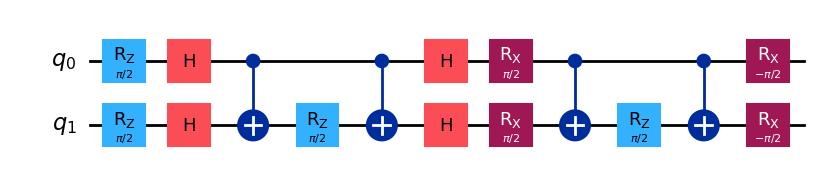

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import PauliEvolutionGate
import numpy as np

# Define the Pauli operator: "IIZI" on 4 qubits
pauli_op = SparsePauliOp(['IZ', 'ZI', 'XX', 'YY'])

# Define the rotation angle (time evolution parameter)
theta = np.pi / 4  # Example value

# Create the PauliEvolutionGate
evolution_gate = PauliEvolutionGate(pauli_op, time=theta)

# Initialize a 4-qubit quantum circuit
qc = QuantumCircuit(2)

# Add the PauliEvolutionGate to the circuit
qc.append(evolution_gate, range(2))

# Show the circuit
qc_decomposed = transpile(qc, basis_gates=['cx', 'rx', 'rz', 'ry', 'h'])
qc_decomposed.draw('mpl')

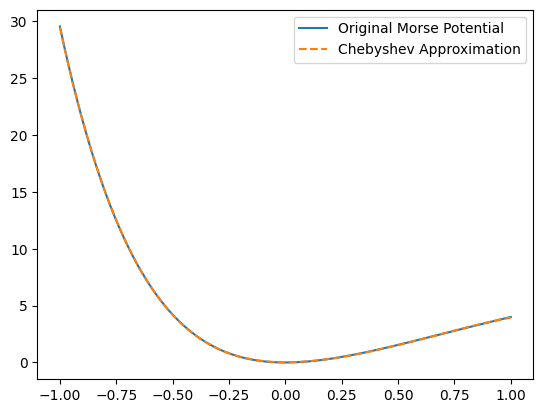

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.chebyshev import Chebyshev

# Define Morse potential


def morse_potential(x, D_e=10, alpha=1, x_eq=0):
    return D_e * (1 - np.exp(-alpha * (x - x_eq)))**2


# Define Chebyshev approximation
x_vals = np.linspace(-1, 1, 100)  # Define range for Chebyshev
V_vals = morse_potential(x_vals)

# Fit Chebyshev polynomial
cheb_fit = Chebyshev.fit(x_vals, V_vals, deg=5)  # Fit with degree 5

# Evaluate approximation
V_approx = cheb_fit(x_vals)

# Compare original and approximate
plt.plot(x_vals, V_vals, label="Original Morse Potential")
plt.plot(x_vals, V_approx, label="Chebyshev Approximation", linestyle='--')
plt.legend()
plt.show()

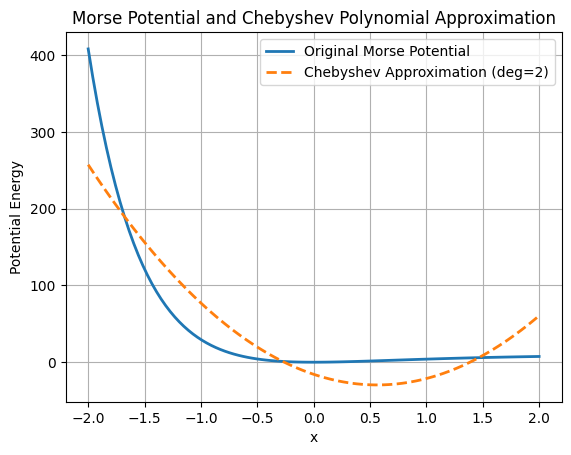

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import Chebyshev

# Parameters for Morse Potential
D_e = 10.0  # Depth of the potential
alpha = 1.0  # Slope of the potential
x_eq = 0.0  # Equilibrium position
x_min, x_max = -2, 2  # Range for x
num_points = 100  # Number of points in the range

# Define the Morse Potential function


def morse_potential(x, D_e, alpha, x_eq):
    return D_e * (1 - np.exp(-alpha * (x - x_eq)))**2


# Generate x values and calculate Morse Potential
x_vals = np.linspace(x_min, x_max, num_points)
V_vals = morse_potential(x_vals, D_e, alpha, x_eq)

# Normalize x_vals to the Chebyshev range [-1, 1] using linear mapping
x_chebyshev = 2 * (x_vals - x_min) / (x_max - x_min) - 1

# Fit a Chebyshev polynomial to the Morse Potential
degree = 2  # Degree of Chebyshev polynomial
cheb_fit = Chebyshev.fit(x_chebyshev, V_vals, deg=degree)

# Evaluate the Chebyshev approximation
V_approx = cheb_fit(x_chebyshev)

# Plot the Morse Potential and its Chebyshev approximation
plt.figure()
plt.plot(x_vals, V_vals, label="Original Morse Potential", linewidth=2)
plt.plot(x_vals, V_approx,
         label=f"Chebyshev Approximation (deg={degree})", linestyle='--', linewidth=2)
plt.title("Morse Potential and Chebyshev Polynomial Approximation")
plt.xlabel("x")
plt.ylabel("Potential Energy")
plt.legend()
plt.grid()
plt.show()

In [4]:
# Retrieve the coefficients of the Chebyshev polynomial
from sympy import symbols, chebyshevt
coefficients = cheb_fit.coef

# Generate the symbolic representation of the Chebyshev polynomial

# Define symbolic variable
x = symbols('x')

# Construct the symbolic Chebyshev polynomial
chebyshev_expression = sum(coeff * chebyshevt(n, x)
                           for n, coeff in enumerate(coefficients))

chebyshev_expression

174.719890110576*x**2 - 98.3673782860303*x - 15.7696515459364

Final Statevector: Statevector([-0.08338491-0.01759539j,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.03764879+0.12727231j,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.09405752+0.09364217j,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.05863452-0.19821488j,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.03764879+0.12727231j,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.14648591-0.14583903j,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.05863452-0.19821488j,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
             -0.31498831+0.06646698j,  0.        +0.j        ,
              0.        +0.j        

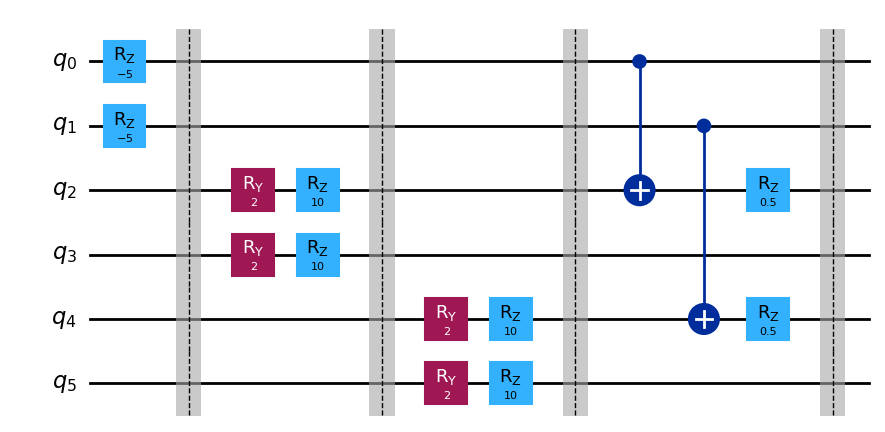

In [5]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

# Parameters
D_e = 10.0
alpha = 1.0
omega_exciton = 5.0
interaction_strength = 0.5
trotter_steps = 1
time = 1.0
dt = time / trotter_steps

# Quantum circuit for 6 qubits
qc = QuantumCircuit(6)

# Trotterization loop
for _ in range(trotter_steps):
    # Exciton Hamiltonian (1st and 2nd qubits)
    qc.rz(-omega_exciton * dt, 0)
    qc.rz(-omega_exciton * dt, 1)

    qc.barrier()

    # Morse Potential for 1st Exciton (3rd and 4th qubits)
    qc.ry(2 * alpha * dt, 2)
    qc.ry(2 * alpha * dt, 3)
    qc.rz(D_e * dt, 2)
    qc.rz(D_e * dt, 3)

    qc.barrier()

    # Morse Potential for 2nd Exciton (5th and 6th qubits)
    qc.ry(2 * alpha * dt, 4)
    qc.ry(2 * alpha * dt, 5)
    qc.rz(D_e * dt, 4)
    qc.rz(D_e * dt, 5)

    qc.barrier()

    # Interaction terms (Entanglement between exciton and Morse modes)
    qc.cx(0, 2)  # 1st Exciton with its Morse mode
    qc.cx(1, 4)  # 2nd Exciton with its Morse mode
    qc.rz(interaction_strength * dt, 2)
    qc.rz(interaction_strength * dt, 4)

    qc.barrier()

# Simulate the circuit
statevector = Statevector.from_instruction(qc)

print("Final Statevector:", statevector)
qc.draw("mpl")

In [6]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import DensityMatrix, SparsePauliOp
from qiskit_aer import AerSimulator
import numpy as np


def decompose_qc(qc):
    return transpile(qc, basis_gates=['cx', 'rx', 'rz', 'ry',
                                      'h', 'x', 'y', 'z'])


def lindblad_open_system(num_qubits, J, h, gamma, time_step):
    # Initialize quantum circuit for 2N qubits to represent density matrix as a superstate
    qc = QuantumCircuit(2 * num_qubits)

    # Initialize density matrix to |0⟩⟨0| (for simplicity)
    qc.initialize([1] + [0] * (2**(2 * num_qubits) - 1), range(2 * num_qubits))

    return decompose_qc(qc)

Final state vector:
Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


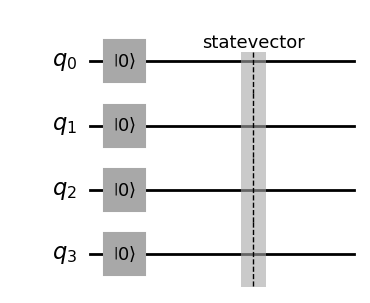

In [7]:
# Define parameters
num_qubits = 2  # Number of spins
J = 1.0         # Coupling constant
h = 1.0         # Transverse field strength
gamma = 0.1     # Dissipation rate
time_step = 0.1  # Time step for evolution

# Generate the circuit
circuit = lindblad_open_system(num_qubits, J, h, gamma, time_step)
circuit.save_statevector()

# Simulate the circuit
backend = AerSimulator()
result = backend.run(circuit).result()
output_state = result.get_statevector()

print("Final state vector:")
print(output_state)

circuit.draw('mpl')

Number of CNOT gates: 52


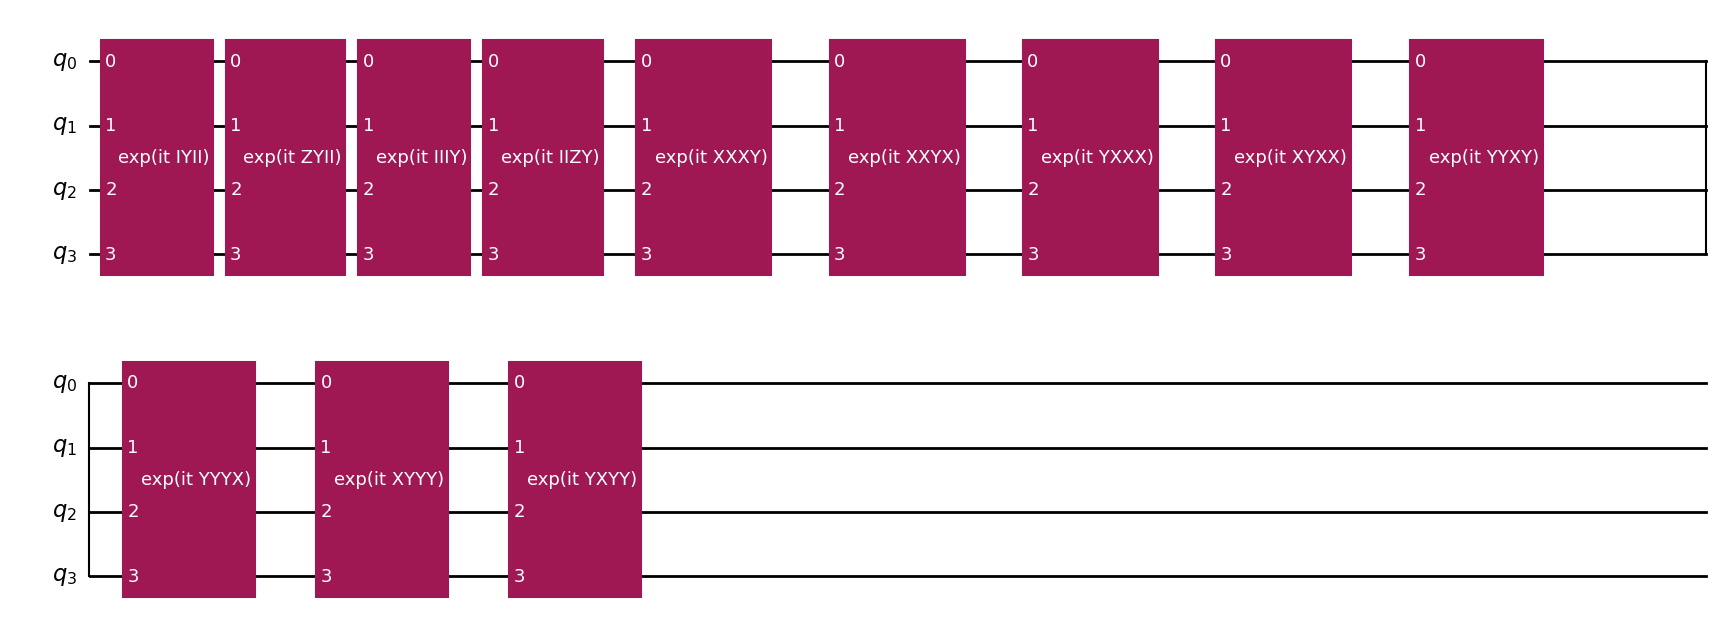

In [10]:
from itertools import permutations
import numpy as np
from scipy.optimize import minimize
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import PauliEvolutionGate


def decompose_qc(qc):
    return transpile(qc, basis_gates=['cx', 'rx', 'rz', 'ry',
                                      'h', 'x', 'y', 'z'])


def add_Ugate_method():
    def Ugate(self, theta0, theta1, num_qubits, time_step):
        gate_terms = []

        # First term: Transverse field part
        for i in range(num_qubits):
            y_term = "I" * (2*i+1) + "Y" + "I" * (2*(num_qubits-i-1))
            z_y_term = "I" * (2*i) + "Z" + "Y" + "I" * (2*(num_qubits-i-1))

            gate_terms.append(SparsePauliOp(y_term,
                                            coeffs=[theta0],
                                            ),
                              )
            gate_terms.append(SparsePauliOp(z_y_term,
                                            coeffs=[-theta0],
                                            ),
                              )

        # Second term: ZZ interaction part
        for i in range(num_qubits - 1):
            for tau_base in [["Y", "X", "X", "X"], ["X", "Y", "Y", "Y"]]:
                unique_permutations = set(permutations(tau_base))
                for tau in unique_permutations:  # Generate all permutations
                    tau_str = "".join(tau)
                    # Adjust parity based on specific cases
                    parity = 1 if tau_str in ["YXXX", "XYYY"] else -1
                    tau_term = "I" * 2*i + tau_str + "I" * 2 * (num_qubits-i-2)
                    gate_terms.append(SparsePauliOp(tau_term,
                                                    coeffs=[parity * theta1/2],
                                                    ),
                                      )

        # Combine all terms into a single SparsePauliOp
        U_operator = sum(gate_terms)

        evolution_gate = PauliEvolutionGate(U_operator, time=time_step)
        self.append(evolution_gate, range(2 * num_qubits))

    QuantumCircuit.Ugate = Ugate


def measure_fidelity(qc, num_qubits, J, h):
    # Initialize the density matrix

    return energy


add_Ugate_method()


# Example Parameters
J = 1.0
h = 0.5
num_qubits = 2
time_step = 0.1
theta_0 = np.pi / 4
theta_1 = np.pi / 2
coefficients = [theta_0, theta_1]


# Initialize quantum circuit
qc = QuantumCircuit(2 * num_qubits)


# Add the Ugate method to the circuit
qc.Ugate(theta_0, theta_1, num_qubits, time_step)


# Number of CNOT gates
cnot_count = qc.decompose().decompose().count_ops().get('cx', 0)
print(f"Number of CNOT gates: {cnot_count}")


# Measure the expectation value of the observable
# energy = measure_expectation(qc, num_qubits, J, h)
# print(f"Measured TFI energy: {energy}")


qc_decomposed = qc.decompose()
qc_decomposed.draw('mpl')

In [ ]:
def cost_function(params):
    theta0, theta1 = params

    # Initialize quantum circuit
    qc = QuantumCircuit(2 * num_qubits)

    # Add the Ugate method to the circuit
    qc.Ugate(theta0, theta1, num_qubits, time_step=0.1)

    # Measure the expectation value of the observable
    return measure_expectation(qc, num_qubits, J, h)


def measure_expectation(qc, num_qubits, J, h):
    pass


initial_params = [np.pi / 4, np.pi / 2]
result = minimize(cost_function, initial_params, method='Powell')
optimal_params = result.x
print(f"Optimal parameters: {optimal_params}")

In [12]:
fidelity_circuit = create_fidelity_circuit_vtc(
    4, initial_params[:num_params], initial_params[num_params:])
fidelity_circuit.draw('mpl')

NameError: name 'create_fidelity_circuit_vtc' is not defined

In [13]:
from itertools import permutations
import numpy as np
from scipy.optimize import minimize
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit.circuit.library import PauliEvolutionGate
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator


def add_Ugate_method():
    def Ugate(self, theta0, theta1, num_qubits, time_step):
        """
        Custom Ugate method to add variational evolution.
        """
        gate_terms = []

        # First term: Transverse field part
        for i in range(num_qubits):
            y_term = "I" * i + "Y" + "I" * (num_qubits - i - 1)
            z_y_term = "I" * i + "Z" + "Y" + "I" * (num_qubits - i - 2)

            gate_terms.append(SparsePauliOp(y_term, coeffs=[theta0]))
            if i < num_qubits - 1:  # Ensure index is valid
                gate_terms.append(SparsePauliOp(z_y_term, coeffs=[-theta0]))

        # Second term: ZZ interaction part
        for i in range(num_qubits - 1):
            zz_term = "I" * i + "ZZ" + "I" * (num_qubits - i - 2)
            gate_terms.append(SparsePauliOp(zz_term, coeffs=[theta1]))

        # Combine all terms into a single SparsePauliOp
        U_operator = sum(gate_terms)

        # Apply evolution gate to the correct number of qubits
        evolution_gate = PauliEvolutionGate(U_operator, time=time_step)
        # Use num_qubits, not 2 * num_qubits
        self.append(evolution_gate, range(num_qubits))

    QuantumCircuit.Ugate = Ugate


class ParameterMemory:
    def __init__(self, initial_params):
        self.prev_params = [0.] * len(initial_params)
        self.current_params = initial_params.copy()

    def update(self, new_params):
        """
        Update the current parameters while keeping the previous parameters fixed.
        """
        self.current_params = new_params.copy()

    def freeze_prev_params(self):
        """
        Freeze the current parameters as the previous parameters.
        """
        self.prev_params = self.current_params.copy()


def create_vtc_circuit(num_qubits, params, repeats=1):
    """
    Create a parameterized VTC circuit for the given Hamiltonian.
    """
    qc = QuantumCircuit(num_qubits)

    param_iter = iter(params)

    for _ in range(repeats):
        qc.Ugate(next(param_iter), next(param_iter), num_qubits, time_step=0.1)

    transpiled_qc = transpile(qc, basis_gates=['cx', 'rx', 'rz', 'ry', 'h'])

    return transpiled_qc


def create_v_gate(num_qubits, delta_t=0.1, J=1.0, h=0.5, reps=1):
    """
    Create the Suzuki-Trotter decomposition-based V gate for TFI Hamiltonian.
    """
    gate_terms = []

    # Interaction term: ZZ
    for i in range(num_qubits - 1):
        zz_term = "I" * i + "ZZ" + "I" * (num_qubits - i - 2)
        gate_terms.append(SparsePauliOp(zz_term, coeffs=[-J]))

    # Transverse field term: X
    for i in range(num_qubits):
        x_term = "I" * i + "X" + "I" * (num_qubits - i - 1)
        gate_terms.append(SparsePauliOp(x_term, coeffs=[-h]))

    # Combine all terms into a single operator
    H_zz = sum(gate_terms[:num_qubits - 1])  # ZZ terms
    H_x = sum(gate_terms[num_qubits - 1:])  # X terms

    # First-order Trotterization: e^(-i H_zz Δt) e^(-i H_x Δt)
    zz_evolution = PauliEvolutionGate(H_zz, time=delta_t)
    x_evolution = PauliEvolutionGate(H_x, time=delta_t)

    # Create a QuantumCircuit for V gate
    v_gate = QuantumCircuit(num_qubits)
    for _ in range(reps):
        v_gate.append(zz_evolution, range(num_qubits))
        v_gate.append(x_evolution, range(num_qubits))

    transpiled_vgate = transpile(
        v_gate, basis_gates=['cx', 'rx', 'rz', 'ry', 'h'])
    return transpiled_vgate


def create_fidelity_circuit_vtc(num_qubits, params, prev_params, repeats=1):
    """
    Create the fidelity measurement circuit using VTC ansatz with V gate.
    """
    # Current step circuit
    current_circuit = create_vtc_circuit(num_qubits, params, repeats)
    current_circuit = current_circuit.inverse()  # Inverse of the circuit

    # Previous step circuit
    previous_circuit = create_vtc_circuit(num_qubits, prev_params, repeats)

    # Time evolution operator V(Δt)
    v_gate = create_v_gate(num_qubits)

    # Combine circuits
    fidelity_circuit = QuantumCircuit(num_qubits)
    fidelity_circuit.compose(previous_circuit, inplace=True)
    fidelity_circuit.compose(v_gate, inplace=True)
    fidelity_circuit.compose(current_circuit, inplace=True)

    fidelity_circuit.measure_all()
    return fidelity_circuit


def cost_function_vtc_with_memory(new_params, param_memory, num_qubits=4, repeats=1):
    """
    Cost function for VTC optimization using ParameterMemory.
    """

    # Calculate fidelity
    fidelity = calculate_fidelity_vtc_with_memory(
        num_qubits, param_memory, repeats=1)

    # print(f"Fidelity = {fidelity}")
    return 1 - fidelity  # Minimize 1 - fidelity


def calculate_fidelity_vtc_with_memory(num_qubits, param_memory, shots=1024, repeats=1):
    """
    Calculate fidelity using VTC with V gate.
    """
    current_params = param_memory.current_params
    prev_params = param_memory.prev_params

    # Create the fidelity circuit
    fidelity_circuit = create_fidelity_circuit_vtc(
        num_qubits, current_params, prev_params, repeats=repeats,
    )

    # Simulate the circuit
    backend = AerSimulator(method='statevector')
    result = backend.run(fidelity_circuit, shots=shots).result()
    counts = result.get_counts()

    # Fidelity is proportional to the probability of the all-zeros state
    zero_state = "0" * num_qubits
    fidelity = counts.get(zero_state, 0) / shots

    return fidelity


add_Ugate_method()

In [14]:
def calculate_correlation(circuit, num_qubits):
    """
    Calculate spin-spin correlation function.
    """
    backend = AerSimulator(method='statevector')
    state = Statevector.from_instruction(circuit)

    correlations = []
    for i in range(num_qubits - 1):
        zz_term = SparsePauliOp("I" * i + "ZZ" + "I" * (num_qubits - i - 2))
        correlation = state.expectation_value(zz_term)
        correlations.append(np.real(correlation))

    return correlations


def calculate_magnetization(circuit, num_qubits):
    """
    Calculate the magnetization in the X and Z directions.
    """
    backend = AerSimulator(method='statevector')
    state = Statevector.from_instruction(circuit)

    # Magnetization operators
    Mx = sum(SparsePauliOp("I" * i + "X" + "I" * (num_qubits - i - 1))
             for i in range(num_qubits))
    Mz = sum(SparsePauliOp("I" * i + "Z" + "I" * (num_qubits - i - 1))
             for i in range(num_qubits))

    # Calculate expectation values
    mx = state.expectation_value(Mx) / num_qubits
    mz = state.expectation_value(Mz) / num_qubits

    return np.real(mx), np.real(mz)

In [15]:
# Time step 설정
num_qubits = 4
repeats = 2
num_timesteps = 10
delta_t = 0.1
initial_params = [0.1, 0.1, 0.1, 0.1]

# ParameterMemory 초기화
param_memory = ParameterMemory(initial_params)

infedities = []
correlations = []
magnetizations = []

# 각 타임스텝에서 최적화 수행
for timestep in range(num_timesteps):
    print(f"\n=== Time Step {timestep + 1} ===")

    # 이전 파라미터 고정
    if timestep > 0:
        param_memory.freeze_prev_params()  # 이전 최적화 결과를 고정

    # 최적화 콜백 함수
    def optimization_callback(new_params):
        param_memory.update(new_params)

    # 최적화 수행
    result = minimize(
        cost_function_vtc_with_memory,
        param_memory.current_params,  # 현재 파라미터로 최적화 시작
        args=(param_memory, num_qubits, repeats),
        method='powell',
        callback=optimization_callback
    )

    # 최적화 결과를 저장
    optimal_params = result.x
    optimal_infidelity = result.fun
    print(f"Optimal parameters at timestep {timestep + 1}: {optimal_params}")
    print(f"Optimal infidelity: {optimal_infidelity}")
    infedities.append(optimal_infidelity)

    # 최적화 결과를 사용하여 회로 생성
    vtc_circuit = create_vtc_circuit(num_qubits, param_memory.current_params)
    correlation = calculate_correlation(vtc_circuit, num_qubits)
    correlations.append(correlation)
    print(f"Correlation at timestep {timestep + 1}: {correlation}")

    mx, mz = calculate_magnetization(vtc_circuit, num_qubits)
    magnetizations.append((mx, mz))
    print(f"Magnetization at timestep {timestep + 1}: Mx={mx}, Mz={mz}")

    # 다음 타임스텝의 초기값으로 설정
    param_memory.update(optimal_params)

print("Optimization complete.")


=== Time Step 1 ===
Optimal parameters at timestep 1: [ 2.80780102  0.74464178 -0.66393204  3.1       ]
Optimal infidelity: 0.0302734375
Correlation at timestep 1: [0.8899735985676716, 0.9688004542519124, 0.9911529265502179]
Magnetization at timestep 1: Mx=0.13161167340152116, Mz=0.9467566638960531

=== Time Step 2 ===
Optimal parameters at timestep 2: [ 4.42583499  0.86040922 -0.66792321  4.71803397]
Optimal infidelity: 0.005859375
Correlation at timestep 2: [0.8529369148237781, 0.9118933147906756, 0.9472145714250928]
Magnetization at timestep 2: Mx=0.18211070705288893, Mz=0.8007072636849702

=== Time Step 3 ===
Optimal parameters at timestep 3: [ 7.86352912  0.83105372 -1.28595721  6.71803397]
Optimal infidelity: 0.2216796875
Correlation at timestep 3: [0.9999963468657411, 0.9999963468790609, 0.9999963468923809]
Magnetization at timestep 3: Mx=-0.0009406572600466881, Mz=-0.0019040155097246603

=== Time Step 4 ===
Optimal parameters at timestep 4: [ 6.09084086  0.75562356 -0.67792322

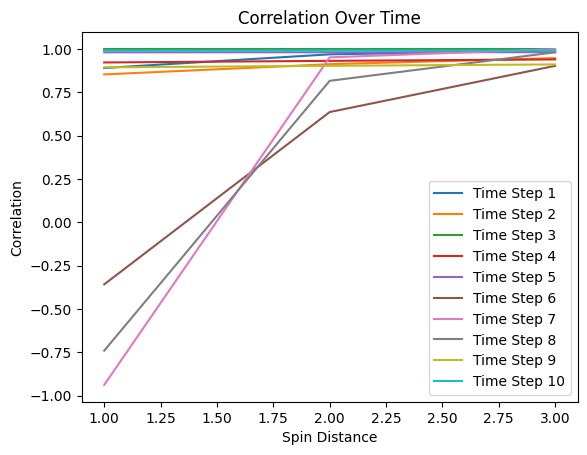

In [19]:
import matplotlib.pyplot as plt

for i, correlation in enumerate(correlations):
    plt.plot(range(1, len(correlation) + 1),
             correlation, label=f"Time Step {i + 1}")
plt.title("Correlation Over Time")
plt.xlabel("Spin Distance")
plt.ylabel("Correlation")
plt.legend()
plt.show()

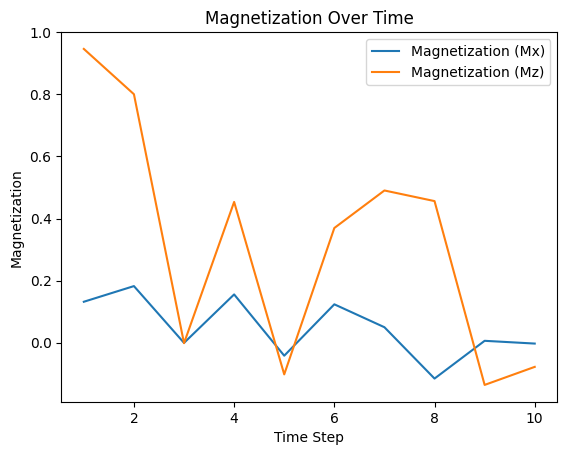

In [20]:
mx_values, mz_values = zip(*magnetizations)
plt.plot(range(1, num_timesteps + 1), mx_values, label="Magnetization (Mx)")
plt.plot(range(1, num_timesteps + 1), mz_values, label="Magnetization (Mz)")
plt.title("Magnetization Over Time")
plt.xlabel("Time Step")
plt.ylabel("Magnetization")
plt.legend()
plt.show()

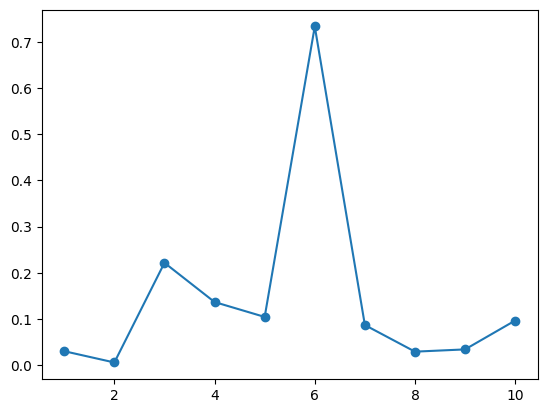

In [18]:
plt.plot(range(1, num_timesteps+1), infedities, marker='o')